<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/U2_S2_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install seaborn==0.9.0 -q

In [2]:
!pip install scipy

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import optimize
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [0]:
sns.__version__

In [94]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [93]:
df.isnull().sum().sum()

0

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df.drop('price', axis=1)
y = df['price']

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [97]:
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [102]:
print ('Intercept:', multiple_lr.intercept_)
print('Coefficients:')
for i in range(X_train.shape[1]):
  print (str(X_train.columns[i]), multiple_lr.coef_[i])

Intercept: -2278702.1490454697
Coefficients:
make -33.80914554237605
body -1721.0250109848403
mileage -39.96352171750823
engV 272.10204942616076
engType -1085.3334443364547
registration 4487.518109358849
year 1145.2506680966533
drive 8462.04541338759


## 1.5 Use the test data to make predictions

In [0]:
y_test_predict = multiple_lr.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [105]:
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)

print('Test RMSE is {}'.format(RMSE))
print('Test R^2 is {}'.format(R2))

Test RMSE is 20338.843481632106
Test R^2 is 0.30479352255023595


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient corresponding to the `year` feature is `1145.2506681` which tells us that relation between `price` and `year` is positive and with increase of the `year` feature by `1` unit we expect the `price` to increase __on average__ by `1145.2506681` units of price measure  (Ukrainian hryvnia, maybe)

## 1.8 How should we interpret the Root-Mean-Square Error?

In [106]:
df['price'].mean()

16185.453304614482

The `RMSE` is the square root of the variance of the residuals, which shows the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. In our model the `RMSE` is `20338`, it shows that prices predicted by the model deviate from the observed prices on average by `20338` units, while the average price is `16185.453304614482`. I'd say it is way too high `RMSE` that needs to be improved.

## 1.9 How should we interpret the $R^2$?

 $R^2$ shows the percentage of the response variable (`price`) variation that is explained by a linear model. In this model it is `30.479%`, which is low. The model needs to be improved.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [107]:
df['ln_price'] = np.log(df['price'])
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

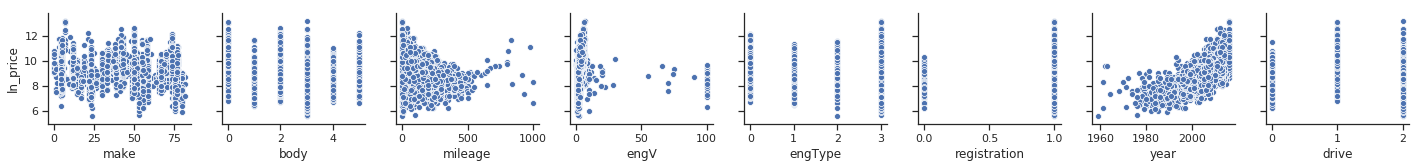

In [108]:
sns.set(style='ticks', color_codes=True)
x_columns = df.columns.drop(['price', 'ln_price'])
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns);

The plots above give some idea of features distribution, however the clearer picture would be better. For this purpose, I'll take a sample dataset and plot it.

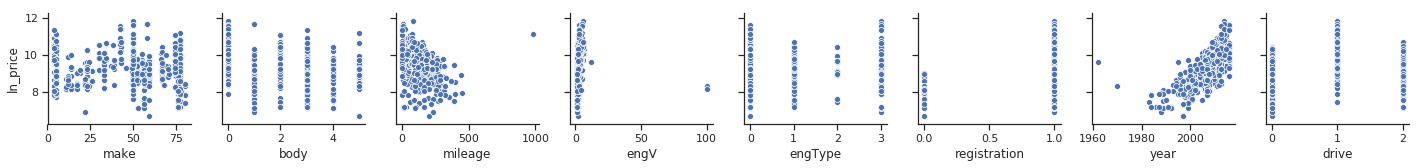

In [109]:
# Sample our dataframe to take 1/20th the values and plot again

sns.set(style="ticks", color_codes=True)
x_columns = df.columns.drop(['price', 'ln_price'])
sampled = df.sample(frac=0.05, replace=True)

sns.pairplot(data=sampled, y_vars=['ln_price'], x_vars=x_columns);

From the graphs of the whole and partial datasets, it seems appropriate to cut the outliers off first

In [110]:
#Cut the outliers off the dataset, and check the shape of the dataframe before 
#and after cutting outliers

print(df.shape)

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

print(df.shape)


(8495, 10)
(7641, 10)


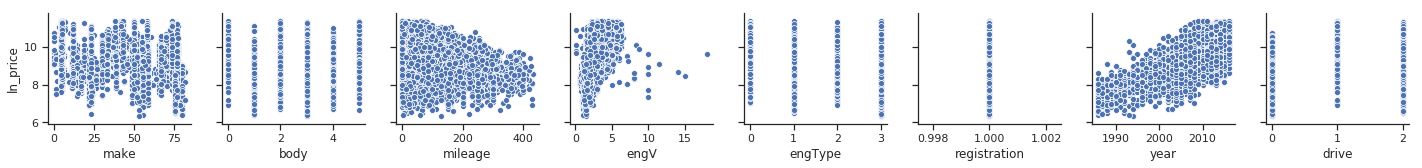

In [111]:
#Graph the pairplots again
sns.set(style='ticks', color_codes=True)
x_columns = df.columns.drop(['price', 'ln_price'])
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns);

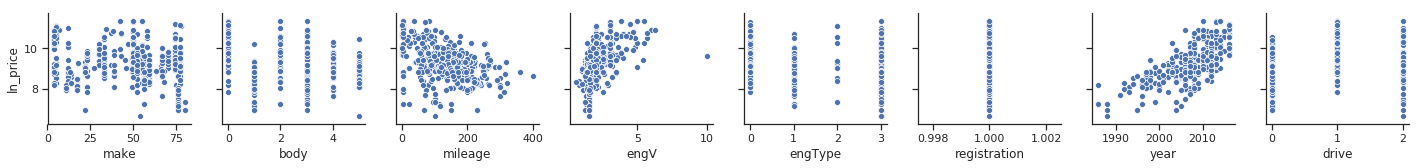

In [112]:
# Sample our dataframe to take 1/20th the values and plot again

sns.set(style="ticks", color_codes=True)
x_columns = df.columns.drop(['price', 'ln_price'])
sampled = df.sample(frac=0.05, replace=True)

sns.pairplot(data=sampled, y_vars=['ln_price'], x_vars=x_columns);

Now, it's more clear that `engV` and `year` look like non-linearly distributed features. Let's check it on residual plots.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


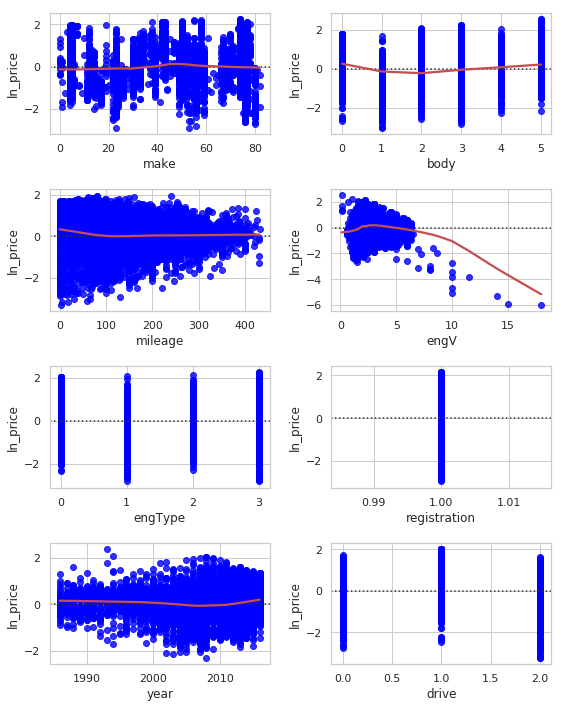

In [113]:
# Check on residual plots

X = df.drop(['price', 'ln_price'], axis=1)
y = df['ln_price']

sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(8,10));

# Positions in the array of axes that I just made
position_list = []
for i in range(4):
    for j in range(2):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'});
plt.tight_layout();

The residuals plot confirmed that `engV` is an appropriate polynomial feature. `body` and `year` need to be checked later too.

## 2.3 If appropriate, create any polynomial features. 

In [114]:
df['engV_squared'] = df['engV']**2
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,engV_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,6.25
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,3.24
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,30.25
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,3.24
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4.00


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [115]:
#First I'll drop the column 'price', I won't use it
df = df.drop('price', axis=1)
df.head()

,make,body,mileage,engV,engType,registration,year,drive,ln_price,engV_squared
0,23,0,68,2.5,1,1,2010,1,9.648595,6.25
1,50,3,173,1.8,1,1,2011,2,9.928180,3.24
2,50,2,135,5.5,3,1,2008,2,10.463103,30.25
3,50,5,162,1.8,0,1,2012,0,9.786954,3.24
4,55,0,83,2.0,3,1,2013,1,9.717158,4.00


In [0]:
# Select X and y features
X = df.drop(['ln_price'], axis=1)
y = df['ln_price']


In [119]:
#Select train and test data, train the model, and neatly print the coefficients and errors
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

R2 = r2_score(Y_test, y_test_predict)


print ('Intercept:', model.intercept_)
print('Coefficients:')
for i in range(X_train.shape[1]):
  print (str(X_train.columns[i]), model.coef_[i])


print('Test RMSE is {}'.format(RMSE))
print('Test R^2 is {}'.format(R2))

Intercept: -173.71124480445175
Coefficients:
make -0.0006080568126407148
body -0.045560111536485384
mileage -0.00021928837084216057
engV 0.6611449337264849
engType -0.04247200200562801
registration -3.622102617839573e-15
year 0.09062462645050325
drive 0.1529436539317689
engV_squared -0.04284244368185558
Test RMSE is 0.4109521679277994
Test R^2 is 0.7586494476284813


In [121]:
# check if the year feature helps too
df['year_squared'] = df['year']**2
df.head()

,make,body,mileage,engV,engType,registration,year,drive,ln_price,engV_squared,year_squared
0,23,0,68,2.5,1,1,2010,1,9.648595,6.25,4040100
1,50,3,173,1.8,1,1,2011,2,9.928180,3.24,4044121
2,50,2,135,5.5,3,1,2008,2,10.463103,30.25,4032064
3,50,5,162,1.8,0,1,2012,0,9.786954,3.24,4048144
4,55,0,83,2.0,3,1,2013,1,9.717158,4.00,4052169


In [0]:
# Select X and y features
X = df.drop(['ln_price'], axis=1)
y = df['ln_price']


In [123]:
#Select train and test data, train the model, and neatly print the coefficients and errors
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

R2 = r2_score(Y_test, y_test_predict)


print ('Intercept:', model.intercept_)
print('Coefficients:')
for i in range(X_train.shape[1]):
  print (str(X_train.columns[i]), model.coef_[i])


print('Test RMSE is {}'.format(RMSE))
print('Test R^2 is {}'.format(R2))

Intercept: 8831.964833952174
Coefficients:
make -0.0006354482773319072
body -0.04473367118561752
mileage 0.0005592394673193109
engV 0.6841497404208545
engType -0.03007715132100639
registration -1.1934897514720433e-15
year -8.906885559744895
drive 0.13723689640459344
engV_squared -0.043865074324759785
year_squared 0.0022472610956340983
Test RMSE is 0.39628165196014115
Test R^2 is 0.7755737385722452


adding year_squared helped to improve the model a little bit

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient on `year` now decreased to `-3.00771513e-02`, since the responce `y` variable is now in `ln(y)` form,  the interpretation of coefficients and erros changed to percentages and this coefficient tells that for every `1 unit` increase in `year`, the `price`  increases by `-3.00771513e-02 * 100%` , on average. The `-` sign shows that prices increase with years with decreasing rate.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}).X_j^{(i)}
\end{equation}

Gradient Descent seeks to find minimum value of a function. A function is at its minimum when it's derivative is equal to zero, which graphically can be shown as zero slope. In machine learning Gradient Descent is used to minimize cost functions, also called error functions or loss functions.  A cost function compares our hypothesis line (with hypothetical theta values) to our actual y values and gives it a cost/error/loss based on how well our hypothesis function fits the data. So, Gradient Descent seeks to minimize that cost/error/lost.

## 3.2 What is the "Learning Rate" and what is its function?

\begin{equation}
\theta_j: = \theta_j -\alpha \frac{\partial J(\theta)}{\partial \theta_j} 
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . 1/m .\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}).X_j^{(i)}
\end{equation}



Learning rate ($\alpha$) is a hyperparameter  that controls how much we are adjusting the weights ($\theta$) of our regression with respect to the cost/loss gradient. In simple words, learning rate determines how fast weights ($\theta$)  change, or put it in other words, how big are steps that we we initially take.

Being a hyperparameter means it's not learned by an algorithm itself from data, it has to be set by a data analyst/scientist before running an algorithm.



# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [124]:
# cov_type='HC3' is the model parameter for robust standard errors

#X = sm.add_constant(X)
X.insert(0,'const',1.0)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X)

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 4.696e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:56:10   Log-Likelihood:                -3687.4
No. Observations:                7641   AIC:                             7395.
Df Residuals:                    7631   BIC:                             7464.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4454.4992    218.010     20.433   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [125]:
print(X.columns)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'engV_squared', 'year_squared'],
      dtype='object')
[0.0, 1.0461963633923628, 1.2307239217739543, 2.1673679709288107, 6.402361207142808, 1.1597392725848206, 0.0, 260812.3875087533, 1.3864060597257555, 5.485547088518588, 261162.90444351622]


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


The VIF test revealed 4 collinear features - engV and engV_squared, and year and year_squared, which is expected. The year_squared's vif is higher than 10, so it should be excluded from the dataset. I'll check the high collinearity by running a correlation matrix as well.

In [126]:
no_const = X.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,registration,year,drive,engV_squared,year_squared
make,1.000000,0.042489,-0.013069,-0.131345,-0.033206,NaN,-0.008857,-0.190768,-0.091044,-0.008811
body,0.042489,1.000000,0.292900,-0.216579,-0.184510,NaN,-0.137412,-0.181447,-0.148446,-0.137617
mileage,-0.013069,0.292900,1.000000,0.075743,-0.215542,NaN,-0.579413,0.088058,0.027514,-0.580156
engV,-0.131345,-0.216579,0.075743,1.000000,-0.025163,NaN,-0.004133,0.419288,0.893452,-0.004402
engType,-0.033206,-0.184510,-0.215542,-0.025163,1.000000,NaN,-0.055835,-0.050359,0.021078,-0.055806
registration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,-0.008857,-0.137412,-0.579413,-0.004133,-0.055835,NaN,1.000000,-0.131078,-0.000954,0.999998
drive,-0.190768,-0.181447,0.088058,0.419288,-0.050359,NaN,-0.131078,1.000000,0.271416,-0.130996
engV_squared,-0.091044,-0.148446,0.027514,0.893452,0.021078,NaN,-0.000954,0.271416,1.000000,-0.001148
year_squared,-0.008811,-0.137617,-0.580156,-0.004402,-0.055806,NaN,0.999998,-0.130996,-0.001148,1.000000


The correlation matrix confirmed the high colleniarity between `engV` and `engV_squared` , and `year` and `year_squared` features, and also between `year` and `mileage`, but not critical.